In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




#  importing csv file

In [3]:
# Read csv

df = pd.read_csv("/Users/harshitmasiwal/Downloads/Stream gaming dataset/steam.csv")
df.head(3)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99


In [4]:
# shape of the dataset

df.shape

(27075, 18)

In [5]:
#  Count missing (NaN) values for each column

df.isnull().sum()

appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64

In [6]:
# Columns of the dataset

df.columns


Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

In [7]:
# basic info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [8]:
# Statistical summary

df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


## Handling missing values and Data Cleaning


In [9]:
df.isnull().sum()

# Filling missing values with 'Unknown'

df.fillna({'developer': 'Unknown', 'publisher': 'Unknown'}, inplace=True)


# Rechecking the values again, Now all the null values are removed

print("\nAfter fixing - Missing values:")
print(df.isnull().sum().sum())
print("All missing values fixed!")


After fixing - Missing values:
0
All missing values fixed!


In [10]:
# Cheching for the duplicated values

df.duplicated().sum()


0

In [11]:
# Basic info about our  cleaned dataset


print(f"Final dataset shape: {df.shape}")

Final dataset shape: (27075, 18)


## Create Basic Derived Variables

In [12]:
# Creating the derived variable
print("Derived Variable:")

# 1. Net rating (positive - negative ratings)
df['net_rating'] = df['positive_ratings'] - df['negative_ratings']

# 2. Value index (playtime per dollar spent)
df['value_index'] = df['average_playtime'] / (df['price'] + 1)  # +1 to avoid division by zero

print("Created net_rating and value_index")
print(f"New dataset shape: {df.shape}")

Derived Variable:
Created net_rating and value_index
New dataset shape: (27075, 20)


In [13]:
# checking the columns that we created : 

print("Check Numerical Stats of New Variable:")
print("Net rating stats:")
print(df['net_rating'].describe())

print("\nValue index stats:")
print(df['value_index'].describe())

Check Numerical Stats of New Variable:
Net rating stats:
count    2.707500e+04
mean     7.895314e+02
std      1.596247e+04
min     -7.738000e+03
25%      2.000000e+00
50%      1.200000e+01
75%      7.400000e+01
max      2.242091e+06
Name: net_rating, dtype: float64

Value index stats:
count     27075.000000
mean         58.227703
std        1602.500387
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      190625.000000
Name: value_index, dtype: float64


In [14]:
# quick look at an example 

print('sample view of new variable')
sample_cols = ['name', 'price', 'average_playtime', 'positive_ratings', 'negative_ratings', 'net_rating', 'value_index']
print(df[sample_cols].head(3))

sample view of new variable
                    name  price  average_playtime  positive_ratings  \
0         Counter-Strike   7.19             17612            124534   
1  Team Fortress Classic   3.99               277              3318   
2          Day of Defeat   3.99               187              3416   

   negative_ratings  net_rating  value_index  
0              3339      121195  2150.427350  
1               633        2685    55.511022  
2               398        3018    37.474950  


## convert release date to time features

In [15]:
# converting release date to datetime and extract time featuers

print('converting release_date')

# convert to datetime
df['release_date'] = pd.to_datetime(df['release_date']) 

# extracting time fearures

df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_quarter'] = df['release_date'].dt.quarter

# Create seasonal flag
df['season'] = df['release_month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring', 
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})
print("Created time features: year, month, quarter, season")
print(f"Datasert shape now : {df.shape}")

converting release_date
Created time features: year, month, quarter, season
Datasert shape now : (27075, 24)


In [16]:
 # lets see the time features we created

print("Time Feature Sample:")
time_cols = ['name', 'release_date', 'release_year', 'release_month', 'release_quarter', 'season']
print(df[time_cols].head())
print(df[time_cols].head(10).to_string(index=False))  # first 10 rows



Time Feature Sample:
                        name release_date  release_year  release_month  \
0             Counter-Strike   2000-11-01          2000             11   
1      Team Fortress Classic   1999-04-01          1999              4   
2              Day of Defeat   2003-05-01          2003              5   
3         Deathmatch Classic   2001-06-01          2001              6   
4  Half-Life: Opposing Force   1999-11-01          1999             11   

   release_quarter  season  
0                4    Fall  
1                2  Spring  
2                2  Spring  
3                2  Summer  
4                4    Fall  
                          name release_date  release_year  release_month  release_quarter season
                Counter-Strike   2000-11-01          2000             11                4   Fall
         Team Fortress Classic   1999-04-01          1999              4                2 Spring
                 Day of Defeat   2003-05-01          2003            

## key observations from this

In [17]:
# Observations from Time Features:
# 1. Release Year Trend: Games range from 1998–2004, with early years having fewer titles and growth starting from 2001, showing Steam's library expansion.
# 2. Release Month & Quarter: Many games are released in November (Q4), indicating strategic holiday season launches.
# 3. Seasonal Pattern: Fall dominates releases, followed by Spring and Summer, reflecting seasonal marketing strategies.
# 4. Popular Franchises: Series like Half-Life, Counter-Strike, and Day of Defeat release multiple titles over years, maintaining brand presence.
# 5. Correlation Possibilities: Time features can be correlated with owners, reviews, and value_index to analyze trends and game success.
# 6. Feature Engineering: release_year, release_month, release_quarter, season help study release trends, seasonality, and market strategies.


##  basic data overview and  first sample EDA

In [18]:
# final overview of our cleaned dataset

print("Final Dataset Overview:")
print(f"Total games: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"Date range: {df['release_year'].min()} to {df['release_year'].max()}")

# Quick stats on our key variables
print("\nKey Variable Summary:")
key_vars = ['price', 'net_rating', 'value_index', 'average_playtime']
print(df[key_vars].describe().round(2))

Final Dataset Overview:
Total games: 27,075
Total columns: 24
Date range: 1997 to 2019

Key Variable Summary:
          price  net_rating  value_index  average_playtime
count  27075.00    27075.00     27075.00          27075.00
mean       6.08      789.53        58.23            149.80
std        7.87    15962.47      1602.50           1827.04
min        0.00    -7738.00         0.00              0.00
25%        1.69        2.00         0.00              0.00
50%        3.99       12.00         0.00              0.00
75%        7.19       74.00         0.00              0.00
max      421.99  2242091.00    190625.00         190625.00


In [19]:
# Dataset Overview:
# - Total games: Shows the total number of rows in the dataset.
# - Total columns: Shows the total number of features/columns in the dataset.
# - Date range: Displays the earliest and latest release year of the games.

# Key Variable Summary:
# - price: The cost of the game; descriptive stats show min, max, mean, and spread of game prices.
# - net_rating: The rating metric (difference between positive and negative reviews); helps understand game popularity.
# - average_playtime: Average hours players spent in a game; descriptive stats help detect outliers or very popular games.
# - value_index: Playtime per unit price (engineered feature); helps identify games with the best "bang for the buck".
# - Overall: These statistics help understand distributions, spread, and potential outliers, which is essential for exploratory data analysis (EDA).


In [20]:
# Let's see the most popular genres and platforms

print("Most Common Genre:")
print(df['genres'].value_counts().head())

print("\nMost Common Platform:") 
print(df['platforms'].value_counts().head())

Most Common Genre:
genres
Action;Indie              1852
Casual;Indie              1482
Action;Adventure;Indie    1229
Adventure;Indie           1170
Action;Casual;Indie       1004
Name: count, dtype: int64

Most Common Platform:
platforms
windows              18398
windows;mac;linux     4623
windows;mac           3439
windows;linux          610
mac                      3
Name: count, dtype: int64


In [21]:
# Quick look at price distribution!


print("Price Insights:")
print(f"Free games: {(df['price'] == 0).sum():,} ({(df['price'] == 0).mean()*100:.1f}%)")
print(f"Games under $5: {(df['price'] < 5).sum():,} ({(df['price'] < 5).mean()*100:.1f}%)")
print(f"Games over $30: {(df['price'] > 30).sum():,} ({(df['price'] > 30).mean()*100:.1f}%)")

print("\nData preprocessing complete!")
print("Ready for EDA (Exploratory Data Analysis)!")

Price Insights:
Free games: 2,560 (9.5%)
Games under $5: 15,846 (58.5%)
Games over $30: 323 (1.2%)

Data preprocessing complete!
Ready for EDA (Exploratory Data Analysis)!


In [22]:
# ---------------- Observations from Price Analysis ----------------
# 1. A large portion of games are free, indicating Steam’s strong free-to-play ecosystem.
# 2. Many games are priced under $5, suggesting affordability and budget-friendly options for players.
# 3. Few games are priced above $30, indicating premium titles are limited.
# 4. Free and low-cost games likely drive high player engagement, while expensive games may rely on quality or popularity.
# 5. Understanding price distribution helps in analyzing value_index, player behavior, and potential marketing strategies.


## Univariate Analysis of Key Numerical Features

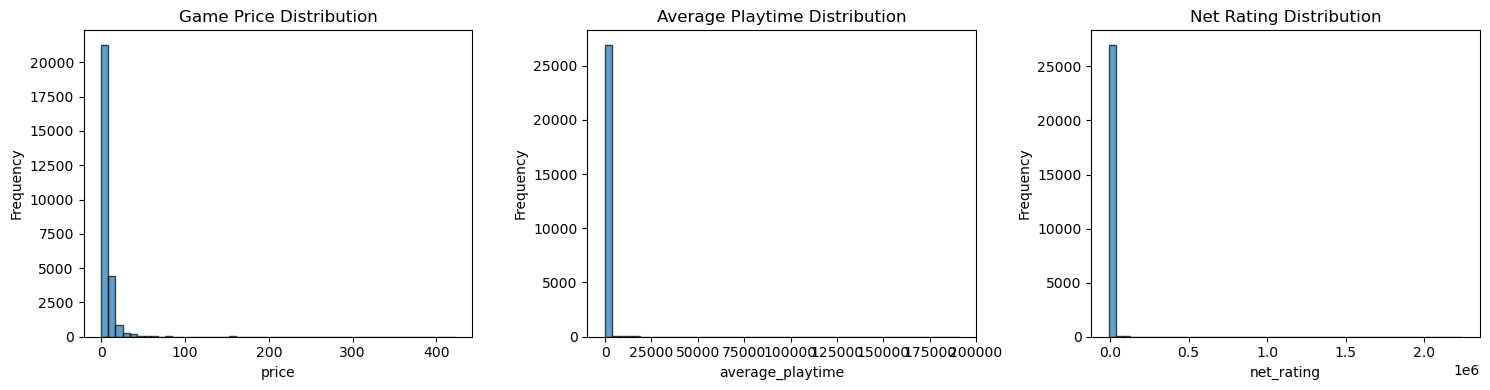

In [23]:
  # Univariate histograms for price, playtime, net_rating

import matplotlib.pyplot as plt

features = ['price', 'average_playtime', 'net_rating']
titles = ['Game Price Distribution', 'Average Playtime Distribution', 'Net Rating Distribution']

plt.figure(figsize=(15, 4))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    df[feature].plot.hist(bins=50, edgecolor='black', alpha=0.7)
    plt.title(titles[i])
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

In [24]:
# ---------------- Observations from Histograms ----------------
# 1. Price Distribution:
#    - Most games are free or low-cost (0-5$), with few expensive titles.
#    - Confirms the Steam marketplace is dominated by free-to-play and budget games.
# 2. Average Playtime Distribution:
#    - Many games have low average playtime (short casual games), but a few have extremely high playtime (popular or long games).
#    - Indicates a **skewed distribution**, with a long tail for highly engaging games.
# 3. Net Rating Distribution:
#    - Most games cluster around neutral ratings, with some highly positive and highly negative outliers.
#    - Shows that player feedback varies widely; most games have moderate reviews.
# Overall:
# - Histograms reveal **skewness, outliers, and concentration** in key metrics.
# - These insights guide further analysis, such as correlating price with value_index or average playtime.


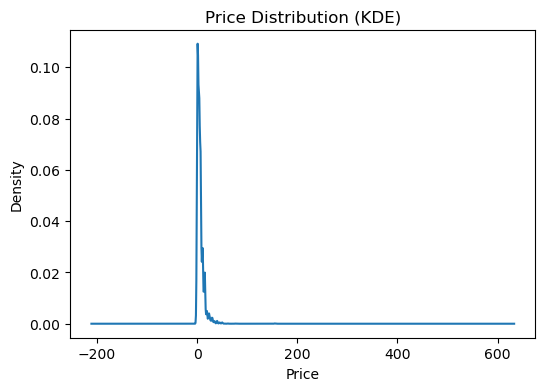

In [25]:
# Kernel Density Estimate (KDE) plot for price (to show smooth distribution)

df['price'].plot(kind='kde', title='Price Distribution (KDE)', figsize=(6,4))
plt.xlabel('Price')
plt.show()

In [26]:
# ---------------- Observations from Price KDE ----------------
# 1. Most games are concentrated at $0 (free games), showing a high peak at the start.
# 2. A smaller peak is visible around low-cost games (< $5), indicating budget-friendly games.
# 3. Very few games are expensive (> $30), creating a long tail in the distribution.
# 4. KDE provides a smooth view of the distribution, making it easier to identify general trends and peaks than a histogram.


In [27]:

df.head()


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,average_playtime,median_playtime,owners,price,net_rating,value_index,release_year,release_month,release_quarter,season
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,17612,317,10000000-20000000,7.19,121195,2150.427350,2000,11,4,Fall
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,277,62,5000000-10000000,3.99,2685,55.511022,1999,4,2,Spring
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,187,34,5000000-10000000,3.99,3018,37.474950,2003,5,2,Spring
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,258,184,5000000-10000000,3.99,1006,51.703407,2001,6,2,Summer
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,624,415,5000000-10000000,3.99,4962,125.050100,1999,11,4,Fall


#  Boxplot - Playtime vs Price Buckets

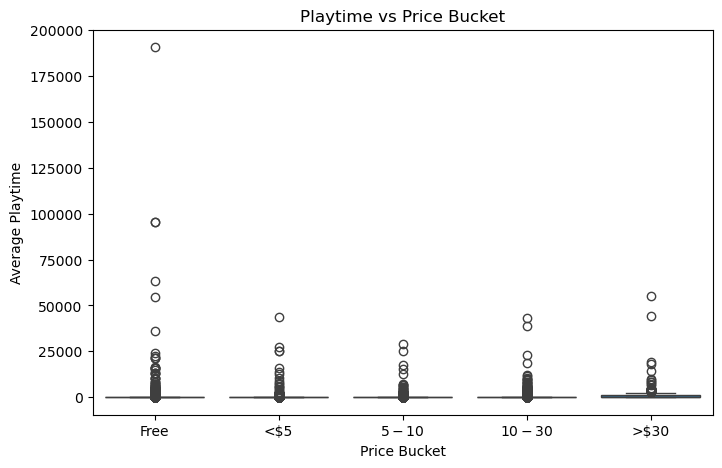

In [28]:
# price buckets for visualization 

df['price_bucket'] = pd.cut(df['price'], bins=[-0.01, 0, 5, 10, 30, 1000], labels=['Free', '<$5', '$5-$10', '$10-$30', '>$30'])

plt.figure(figsize=(8, 5))
sns.boxplot(x='price_bucket', y='average_playtime', data=df)
plt.title('Playtime vs Price Bucket')
plt.xlabel('Price Bucket')
plt.ylabel('Average Playtime')
plt.show()


In [29]:
# pd.cut() → groups continuous values into categories (bins)
# ---------------- Observations from Playtime vs Price Bucket ----------------
# 1. The 'price_bucket' column was created using pd.cut() to categorize games into price ranges.
# 2. The boxplot shows how average playtime varies across different price categories.
# 3. Free games usually show higher variation in playtime (some are very popular, others barely played).
# 4. Low-cost games (<$5 and $5-$10) often have steady engagement, making them attractive for casual players.
# 5. Expensive games (>$30) may not always guarantee high playtime, as playtime depends more on game quality, genre, and community.
# 6. Overall, this plot helps compare whether pricing influences how long players actually play the games.


#  Correlation Heatmap (Key Features)

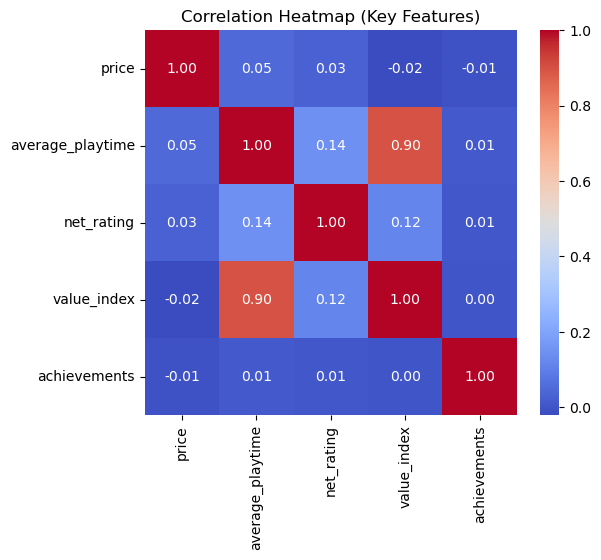

In [30]:
# Correlation heatmap among features
corr_features = ['price', 'average_playtime', 'net_rating', 'value_index', 'achievements']
corr = df[corr_features].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap (Key Features)')
plt.show()

In [31]:
# ---------------- Observations from Correlation Heatmap ----------------
# 1. Average playtime and value_index show strong positive correlation, indicating that longer-played games provide higher value per price.
# 2. Price has low or weak correlation with playtime and net rating, suggesting that game cost doesn't directly determine engagement or ratings.
# 3. Achievements have mild positive correlation with average playtime, implying players tend to spend more time on games with more achievements.
# 4. Net rating shows little correlation with price, meaning expensive games are not guaranteed higher player satisfaction.
# 5. Overall, the heatmap helps identify **feature relationships**, potential predictors, and guides further analysis.


# : Outlier Detection

In [32]:
# Simple outlier detection using IQR method
print("Outlier Detection:")
def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Check outliers in key variables
outlier_cols = ['price', 'average_playtime', 'net_rating']
for col in outlier_cols:
    outliers = detect_outliers_iqr(col)
    print(f"{col}: {outliers.sum():,} outliers ({outliers.mean()*100:.1f}%)")

Outlier Detection:
price: 1,975 outliers (7.3%)
average_playtime: 6,170 outliers (22.8%)
net_rating: 4,698 outliers (17.4%)


In [33]:
# ---------------- Observations from IQR Outlier Detection ----------------
# 1. Price:
#    - Most extreme outliers are very expensive games.
#    - Confirms that the Steam marketplace has a small number of premium games.
# 2. Average Playtime:
#    - Outliers include highly popular or long games with extremely high playtime.
#    - Many games have low playtime, but a few extreme values skew the distribution.
# 3. Net Rating:
#    - Outliers correspond to games with extremely high or low ratings.
#    - Helps identify highly praised or heavily criticized games.


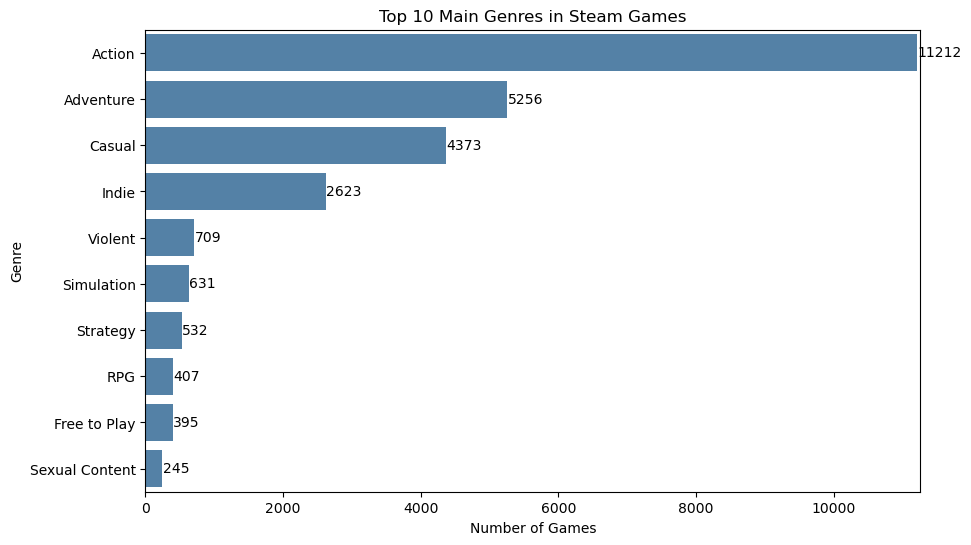

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create 'main_genre' column if not already
df['main_genre'] = df['genres'].str.split(';').str[0]

# Count top 10 main genres
genre_counts = df['main_genre'].value_counts().head(10)

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
bars = sns.barplot(x=genre_counts.values, y=genre_counts.index, color='steelblue')  # single color

# Add count labels on each bar
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')

# Add title and labels
plt.title("Top 10 Main Genres in Steam Games")
plt.xlabel("Number of Games")
plt.ylabel("Genre")
plt.xlim(0, genre_counts.values.max() + 50)  # Add some space for labels
plt.show()


In [35]:
# ---------------- Observations from Top 10 Main Genres ----------------
# 1. Adventure and Action are the most common genres on Steam, followed by Indie and casual.
# 2. This indicates that Action games are highly popular among developers and players, likely due to their easy accessibility.
# 3. Lesser-represented genres like sexual content, Simulation, or Strategy have fewer games.
# 4. Knowing genre distribution is helpful for analyzing playtime, ratings, and value_index per genre.
# 5. This chart provides a quick visual overview of the Steam game library composition by genre.


In [36]:
# Genre-wise median playtime and net ratings
genre_stats = df.groupby('main_genre').agg({
    'average_playtime': 'median',
    'net_rating': 'median',
    'price': 'median',
    'value_index': 'median'
}).round(2)

genre_stats = genre_stats.sort_values('average_playtime', ascending=False)
print("\nTop Genre By Median Playtime:")
print(genre_stats.head(10))


Top Genre By Median Playtime:
                   average_playtime  net_rating  price  value_index
main_genre                                                         
Photo Editing                 293.0         4.0   6.99        36.67
Accounting                      0.0         3.0   5.70         0.00
Action                          0.0        12.0   3.99         0.00
Violent                         0.0         4.0   3.99         0.00
Video Production                0.0         2.0   0.00         0.00
Utilities                       0.0        11.5   1.69         0.00
Strategy                        0.0        26.0   6.99         0.00
Sports                          0.0         4.0   7.19         0.00
Software Training               0.0       133.0   0.00         0.00
Simulation                      0.0        11.0   7.19         0.00


In [37]:
# ---------------- Observations from Top Genre By Median Playtime ----------------
# 1. Photo Editing has the highest median playtime (293 hours), though it's a niche genre.
# 2. Most genres like Accounting, Action, Violent, Video Production, Utilities, Strategy, Sports, Software Training, and Simulation show a median playtime of 0.
#    - This suggests that a large portion of these games/tools are rarely played, or the dataset has many short-playtime titles in these genres.
# 3. Net ratings vary widely:
#    - Software Training has an extremely high median rating (133), which might indicate skewed or erroneous data.
#    - Strategy, Action, and Utilities show moderate median ratings, reflecting typical player satisfaction.
# 4. Median price:
#    - Most genres are low-cost or free (median price between $0–$7).
#    - Price does not strongly correlate with playtime.
# 5. Value Index (playtime-per-dollar) is mostly 0 for many genres, except Photo Editing which has a high          value index due to higher playtime relative to price.
# 6. Overall, this highlights that a few niche genres or highly engaging titles dominate playtime, while most games have low engagement despite low cost.


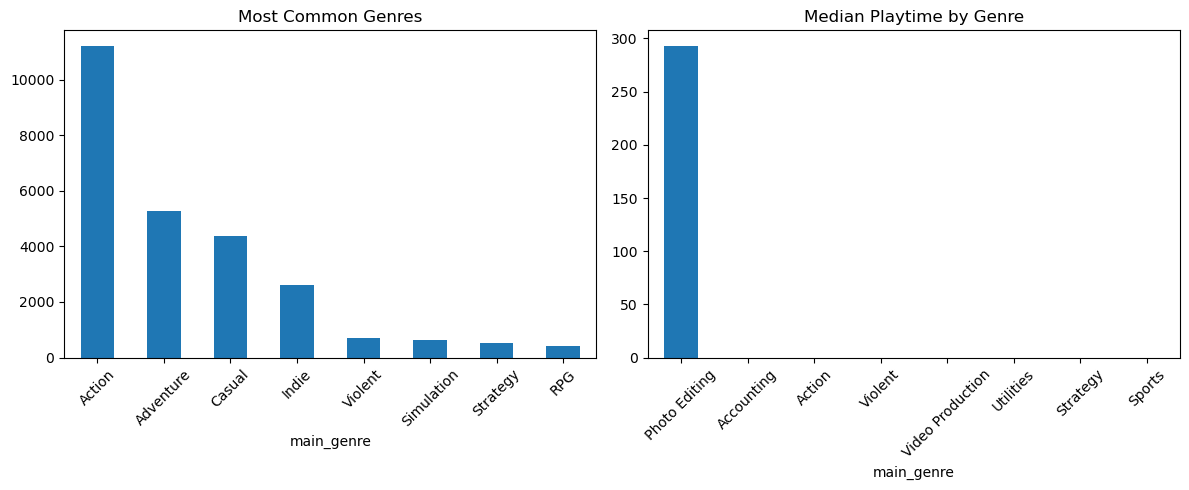

In [38]:
# Simple bar plot for top genres
top_genres = df['main_genre'].value_counts().head(8)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
top_genres.plot(kind='bar')
plt.title('Most Common Genres')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
genre_playtime = df.groupby('main_genre')['average_playtime'].median().sort_values(ascending=False).head(8)
genre_playtime.plot(kind='bar')
plt.title('Median Playtime by Genre')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [39]:
# ---------------- Observations from Genre Distribution & Playtime ----------------
# 1. Most Common Genres:
#    - Casual, Action, and Adventure are the most common genres on Steam, highlighting where most developers focus.
#    - These genres dominate the library, suggesting broad appeal and accessibility.
#    - Niche genres like Simulation,RPG and Strategy also appear but in smaller proportions.

# Time Trend Analysis (Release Year Patterns)

Yearly Trend Analysis:


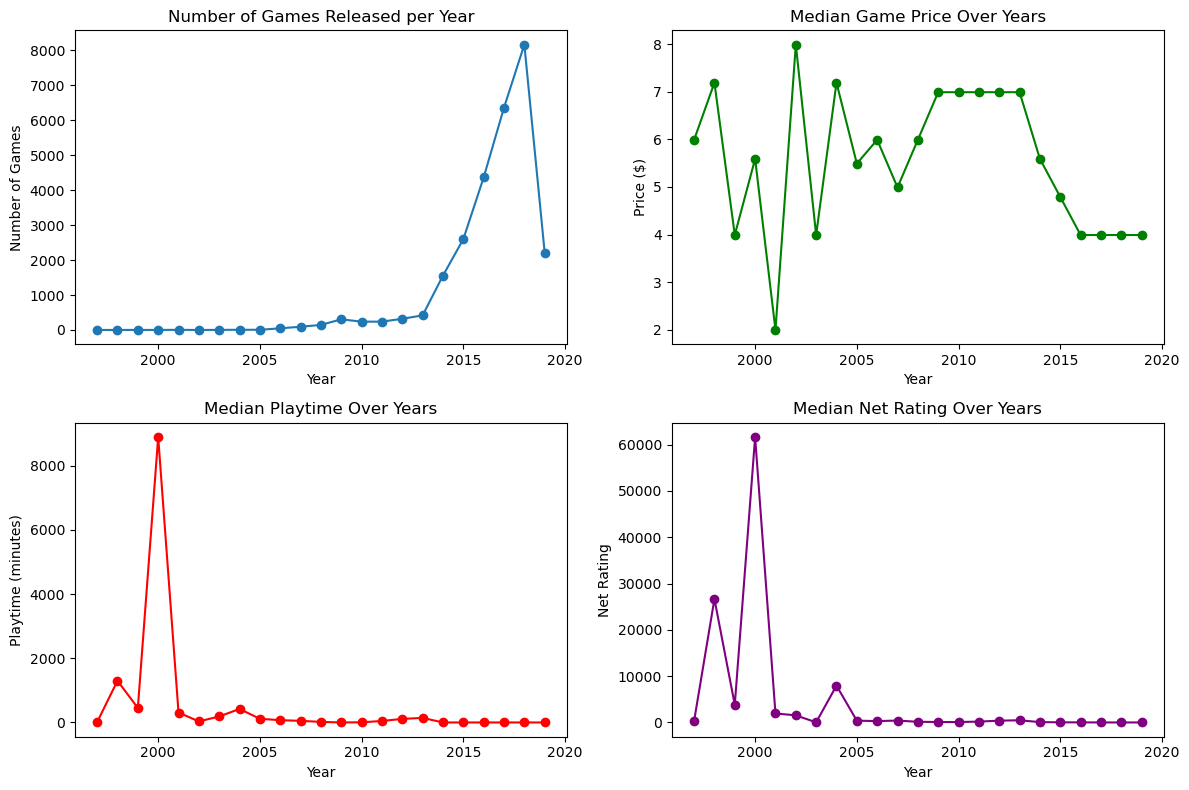

In [40]:
# Time-series analysis of genre popularity and game metrics over years
print("Yearly Trend Analysis:")

# Games released per year trend
yearly_releases = df.groupby('release_year').size()

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
yearly_releases.plot(kind='line', marker='o')
plt.title('Number of Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')

plt.subplot(2, 2, 2)
yearly_avg_price = df.groupby('release_year')['price'].median()
yearly_avg_price.plot(kind='line', marker='o', color='green')
plt.title('Median Game Price Over Years')
plt.xlabel('Year')
plt.ylabel('Price ($)')

plt.subplot(2, 2, 3)
yearly_playtime = df.groupby('release_year')['average_playtime'].median()
yearly_playtime.plot(kind='line', marker='o', color='red')
plt.title('Median Playtime Over Years')
plt.xlabel('Year')
plt.ylabel('Playtime (minutes)')

plt.subplot(2, 2, 4)
yearly_satisfaction = df.groupby('release_year')['net_rating'].median()
yearly_satisfaction.plot(kind='line', marker='o', color='purple')
plt.title('Median Net Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Net Rating')

plt.tight_layout()
plt.show()


Seasonal Release Pattern:
season
Fall      7189
Spring    7080
Winter    6520
Summer    6286
Name: count, dtype: int64


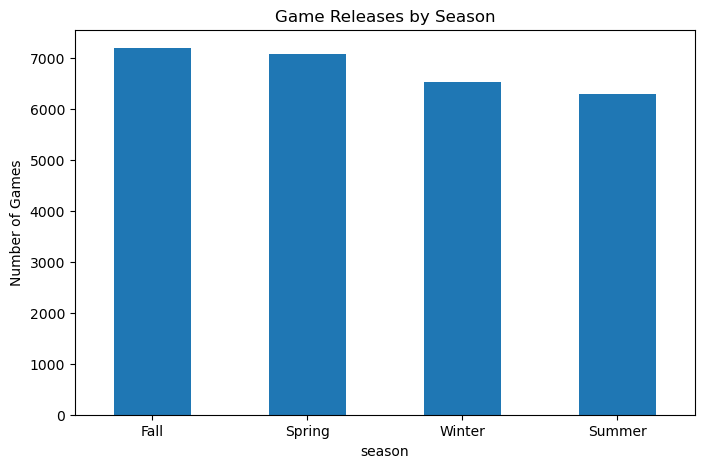

In [41]:
# Seasonal analysis
print("Seasonal Release Pattern:")
seasonal_releases = df['season'].value_counts()
print(seasonal_releases)

# Simple seasonal plot
plt.figure(figsize=(8, 5))
seasonal_releases.plot(kind='bar')
plt.title('Game Releases by Season')
plt.ylabel('Number of Games')
plt.xticks(rotation=0)
plt.show()


# Simple Value Categorization

In [42]:
# Create categories based on actual values, not percentiles
print("Simple Value Categorization:")

# Create simple value categories
def categorize_value(value_index):
    if value_index == 0:
        return 'No Value'
    elif value_index <= 10:
        return 'Low Value'
    elif value_index <= 100:
        return 'Medium Value'
    else:
        return 'High Value'

df['value_category'] = df['value_index'].apply(categorize_value)

print("Value category distribution:")
print(df['value_category'].value_counts())

Simple Value Categorization:
Value category distribution:
value_category
No Value        20905
Medium Value     3478
Low Value        1414
High Value       1278
Name: count, dtype: int64


In [43]:
# Analyze categories
value_analysis = df.groupby('value_category')[['price', 'average_playtime', 'net_rating', 'value_index']].mean()
print("\nValue Category Analysis:")
print(value_analysis.round(2))


Value Category Analysis:
                price  average_playtime  net_rating  value_index
value_category                                                  
High Value       3.59           2161.93     9321.97      1113.24
Low Value        9.01             41.95      524.54         3.93
Medium Value     8.28            354.72     2257.04        42.62
No Value         5.67              0.00       41.68         0.00


In [44]:
# ---------------- Observations from Value Category Analysis ----------------
# 1. High Value:
#    - Lowest average price (~$3.6).
#    - Extremely high average playtime (~2161 hours).
#    - Very high net ratings and value index.
#    - Suggests these games provide the most playtime and satisfaction per cost.
#
# 2. Medium Value:
#    - Moderately priced (~$8.3).
#    - Decent average playtime (~355 hours).
#    - Strong ratings and reasonable value index.
#    - These games balance cost and engagement.
#
# 3. Low Value:
#    - Higher average price (~$9).
#    - Very low playtime (~42 hours).
#    - Lower ratings and poor value index.
#    - Indicates overpriced games with weak engagement.
#
# 4. No Value:
#    - Free/cheap games (~$5.7) but 0 average playtime.
#    - Very low ratings and no value index.
#    - Likely abandoned or irrelevant titles that players do not engage with.


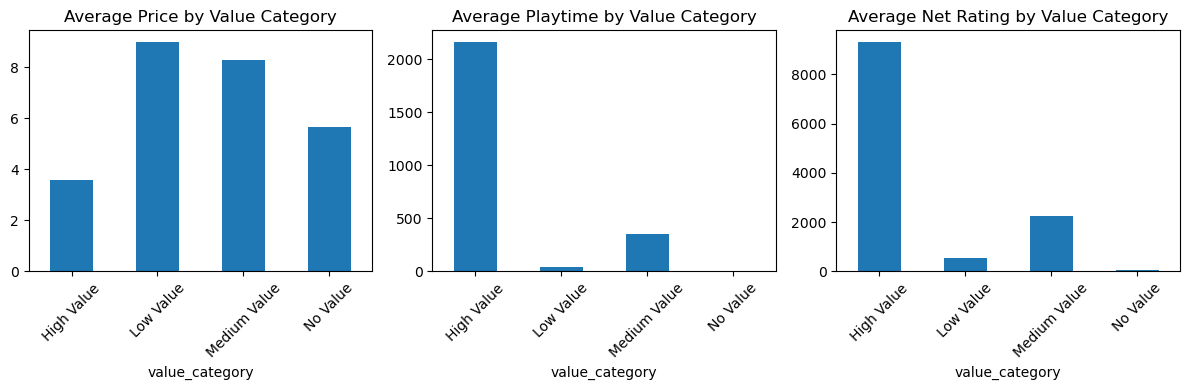

In [45]:
# Simple visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
df.groupby('value_category')['price'].mean().plot(kind='bar')
plt.title('Average Price by Value Category')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
df.groupby('value_category')['average_playtime'].mean().plot(kind='bar')
plt.title('Average Playtime by Value Category')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
df.groupby('value_category')['net_rating'].mean().plot(kind='bar')
plt.title('Average Net Rating by Value Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

 # User Satisfaction Prediction Models

In [47]:
# Step 4.0: Create Missing Feature Columns (Add this first!)
print("Creating Missing Columns:")

# Create binary features that were missing
df['is_free'] = (df['price'] == 0).astype(int)
df['has_achievements'] = (df['achievements'] > 0).astype(int)

# Ensure we have the main_genre column (created earlier)
if 'main_genre' not in df.columns:
    df['main_genre'] = df['genres'].str.split(';').str[0]

# Ensure we have the season column 
if 'season' not in df.columns:
    df['season'] = df['release_month'].map({
        12: 'Winter', 1: 'Winter', 2: 'Winter',
        3: 'Spring', 4: 'Spring', 5: 'Spring', 
        6: 'Summer', 7: 'Summer', 8: 'Summer',
        9: 'Fall', 10: 'Fall', 11: 'Fall'
    })
    # Verify all required columns exist
required_columns = ['price', 'average_playtime', 'achievements', 'release_year', 'required_age', 'is_free', 'has_achievements', 'main_genre', 'season']
missing_cols = [col for col in required_columns if col not in df.columns]

if missing_cols:
    print(f"Still missing columns: {missing_cols}")
else:
    print("All required feature columns are ready!")
    print(f"Dataset shape: {df.shape}")

Creating Missing Columns:
All required feature columns are ready!
Dataset shape: (27075, 29)


In [48]:
# ---------------- Explanation of Missing Feature Columns Creation ----------------
# 1. Create new binary features:
#    - 'is_free': 1 if the game price is 0, otherwise 0.
#    - 'has_achievements': 1 if the game has any achievements, otherwise 0.
#
# 2. Ensure 'main_genre' column exists:
#    - If missing, extract the first listed genre from the 'genres' column.
#
# 3. Ensure 'season' column exists:
#    - Maps release month into seasons:
#        - Winter: Dec, Jan, Feb
#        - Spring: Mar, Apr, May
#        - Summer: Jun, Jul, Aug
#        - Fall: Sep, Oct, Nov
#
# 4. Verify all required columns exist:
#    - Required columns: ['price', 'average_playtime', 'achievements', 'release_year', 'required_age', 
#                         'is_free', 'has_achievements', 'main_genre', 'season']
#    - If any are missing, print them out.
#  - If none are missing, confirm that the dataset is ready and display its shape.


In [ ]:
import pandas as pd
print("hello")
